In [208]:
library(readr)
require(rugarch)
library(readxl)
library(forecast)
library(tseries)
library(readxl)
library(tm)
library(SnowballC)
library(wordcloud)
library(ggplot2)
library(dplyr)
library(readr)
library(cluster)
library(tidyverse)
library(tokenizers)
library(textstem)
library(corpus)
library(qdapTools)
library(qdapRegex)
library(crtests)
library(textclean)
library(quanteda)
library(writexl)
library(e1071)
library(ggplot2)
library(caret)
library(foreign)
library(readstata13)


In [219]:
data <- read_excel("datossolomin.xlsx")
train= data[1:3138,]
test= data[-(1:3138),]

In [28]:
logtrain= log(train$minimo)
logtest= log(test$minimo)

In [35]:
#ts.plot(diff(logtest),type='l',main='Rendimiento del IPC')

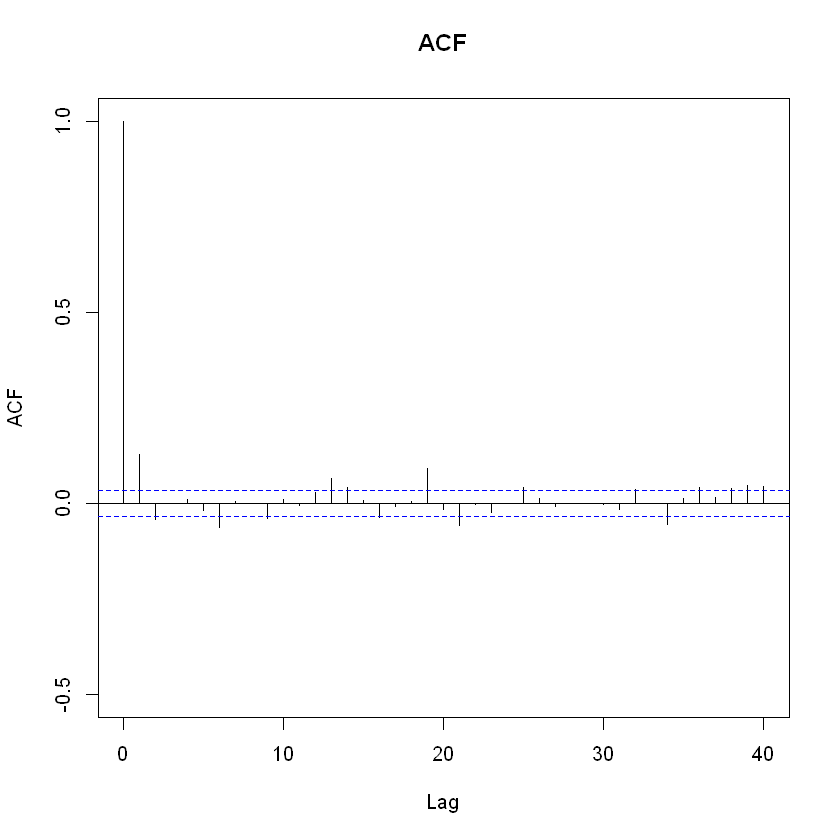

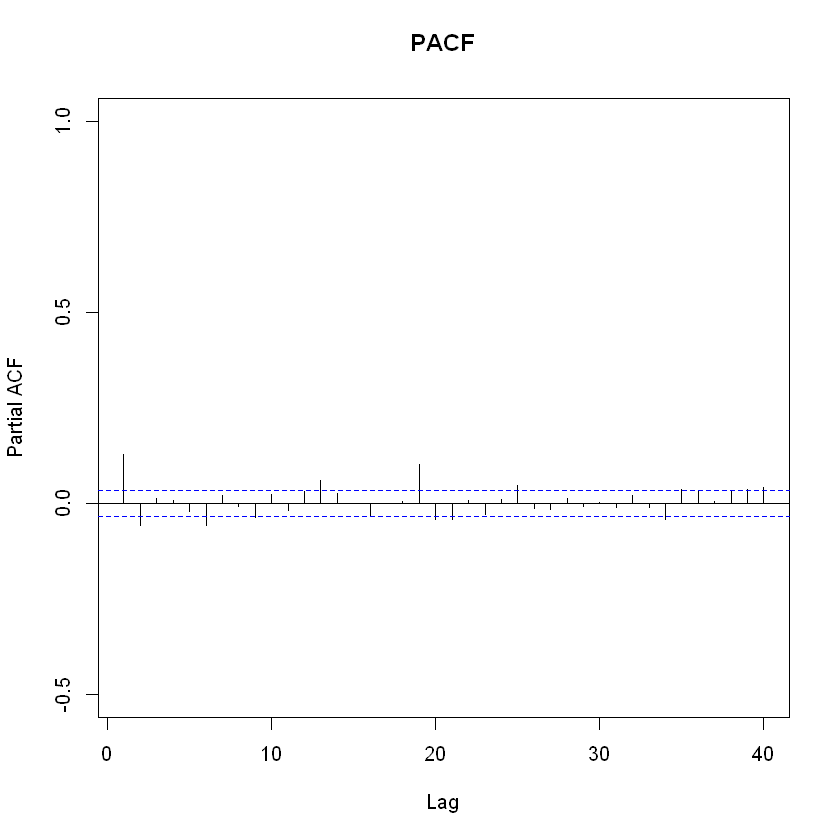

In [39]:
#plot(train$minimo,type='l',main='precio min. petroleo')
acf(diff(logtrain),main='ACF',lag.max=40,ylim=c(- 0.5,1))
pacf(diff(logtrain),main='PACF',lag.max=40,ylim=c(- 0.5,1))

In [71]:
arima211= arima(logtrain,order=c(2,1,1))
arima211


Call:
arima(x = logtrain, order = c(2, 1, 1))

Coefficients:
          ar1      ar2     ma1
      -0.0314  -0.0368  0.1679
s.e.   0.2584   0.0399  0.2583

sigma^2 estimated as 0.0004056:  log likelihood = 7798.87,  aic = -15589.74

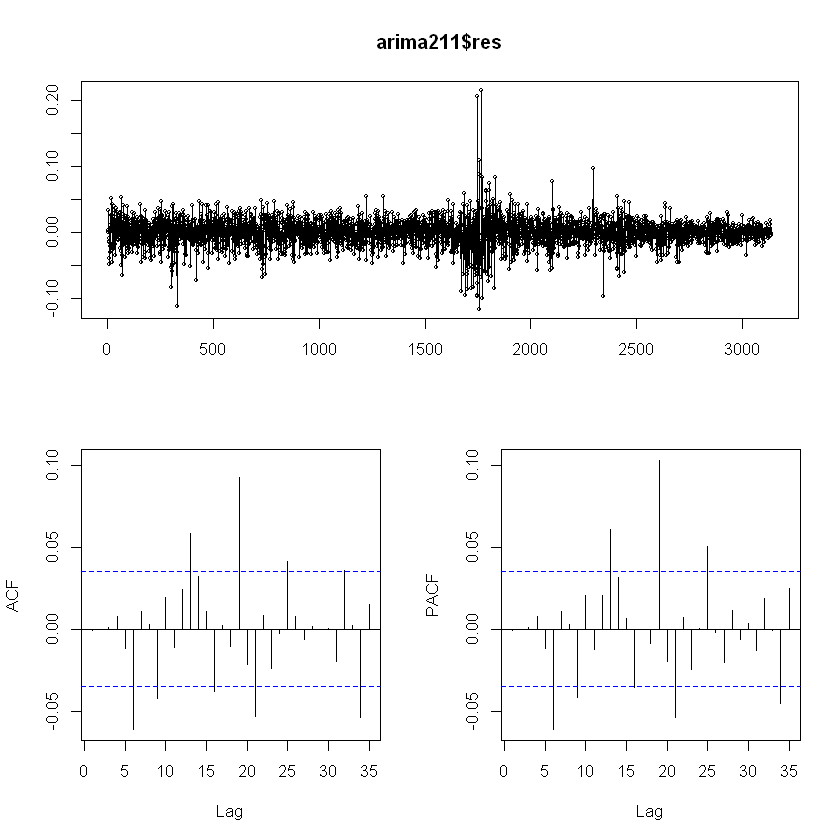

In [79]:
tsdisplay(arima211$res)

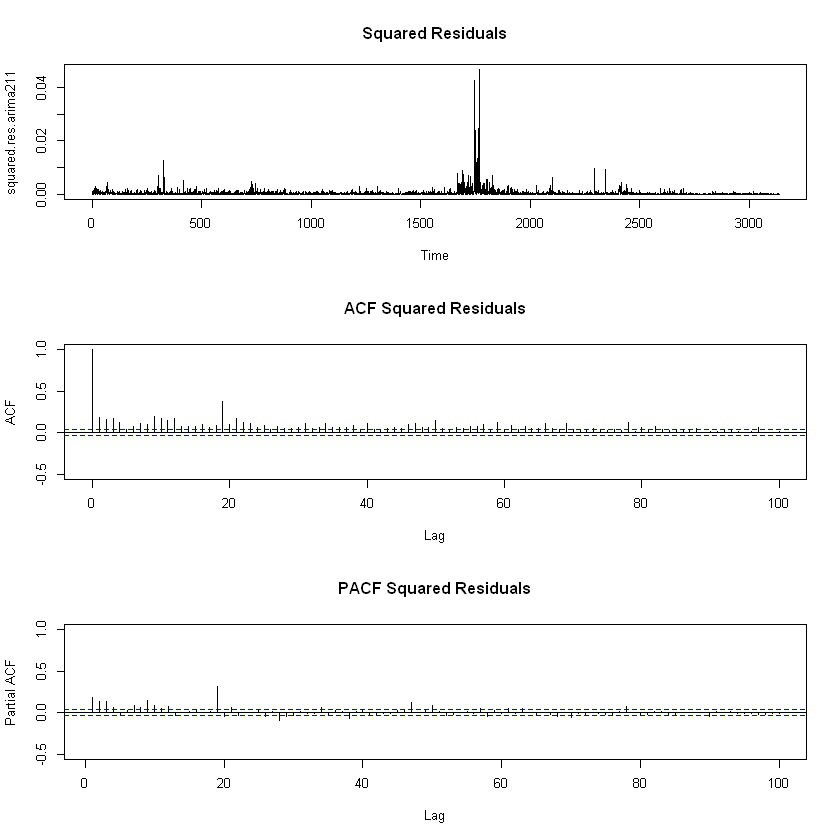

In [80]:
res.arima211=arima211$res
squared.res.arima211=res.arima211^2
par(mfcol=c(3,1))
plot(squared.res.arima211,main='Squared Residuals')
acf.squared211=acf(squared.res.arima211,main='ACF Squared Residuals',lag.max=100,ylim=c(-0.5,1))
pacf.squared211=pacf(squared.res.arima211,main='PACF Squared Residuals',lag.max=100,ylim=c(-0.5,1))

In [113]:
arch11=garch(res.arima211,order=c(0,11),trace=F)
loglik11=logLik(arch11)
summary(arch11)
loglik11


Call:
garch(x = res.arima211, order = c(0, 11), trace = F)

Model:
GARCH(0,11)

Residuals:
     Min       1Q   Median       3Q      Max 
-5.78043 -0.52061  0.08896  0.63686  7.08945 

Coefficient(s):
     Estimate  Std. Error  t value Pr(>|t|)    
a0  1.251e-04   6.981e-06   17.919  < 2e-16 ***
a1  4.044e-02   1.539e-02    2.628 0.008598 ** 
a2  1.073e-01   1.488e-02    7.211 5.56e-13 ***
a3  8.154e-02   1.690e-02    4.825 1.40e-06 ***
a4  2.646e-02   1.431e-02    1.849 0.064413 .  
a5  5.139e-02   1.719e-02    2.989 0.002798 ** 
a6  2.319e-02   1.408e-02    1.648 0.099414 .  
a7  2.789e-02   1.650e-02    1.690 0.091001 .  
a8  3.356e-02   1.679e-02    1.999 0.045589 *  
a9  1.232e-01   1.797e-02    6.857 7.02e-12 ***
a10 8.497e-02   1.649e-02    5.153 2.56e-07 ***
a11 6.959e-02   1.878e-02    3.704 0.000212 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Diagnostic Tests:
	Jarque Bera Test

data:  Residuals
X-squared = 771.28, df = 2, p-value < 2.2e-16


	Box-

'log Lik.' 8129.532 (df=12)

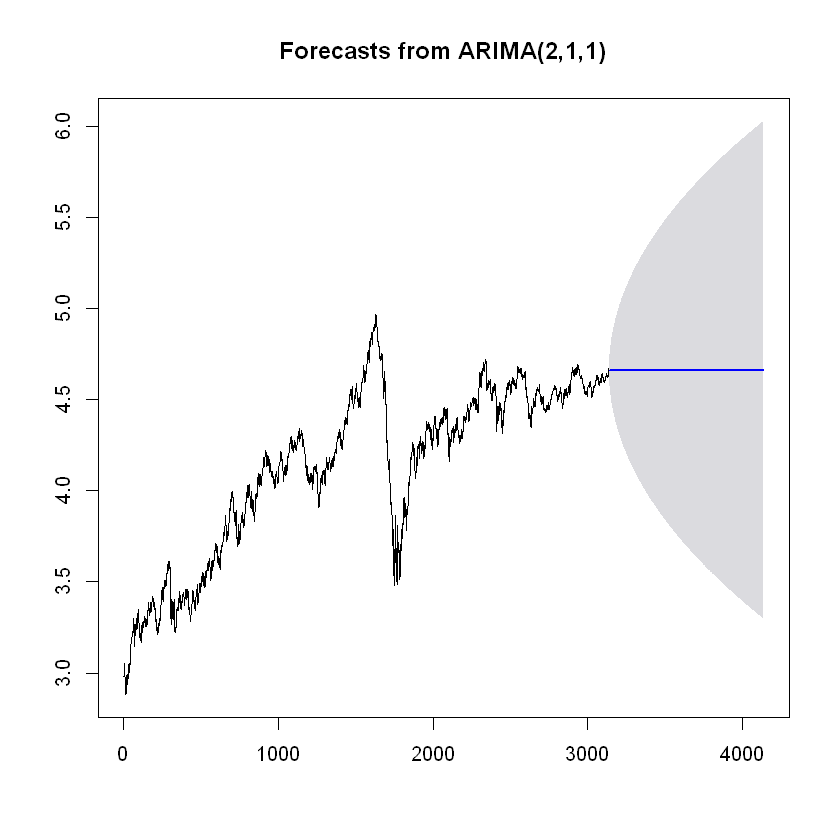

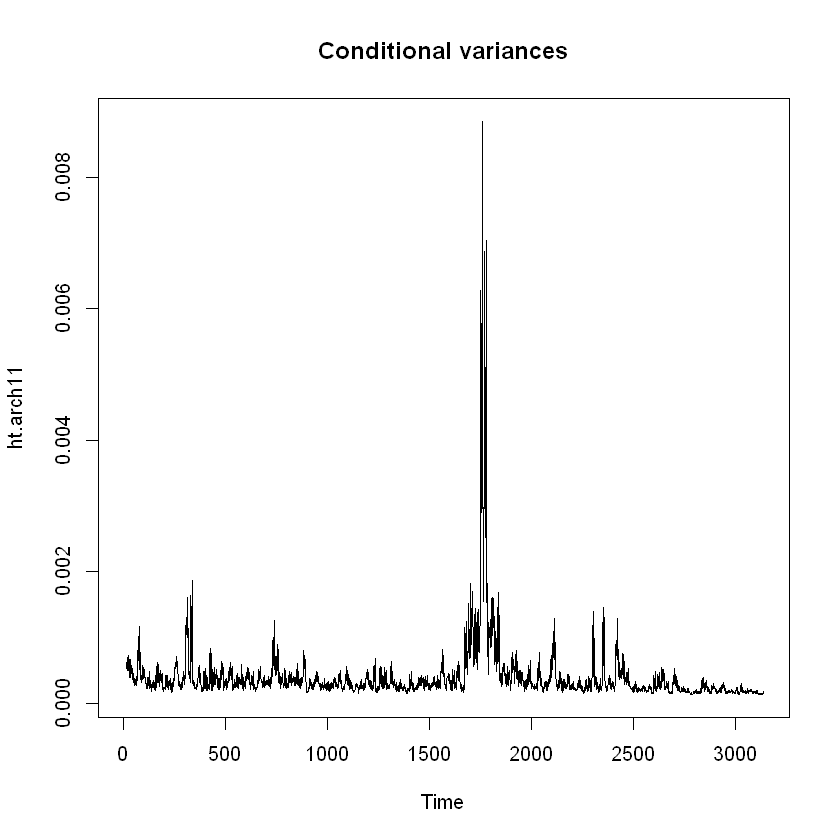

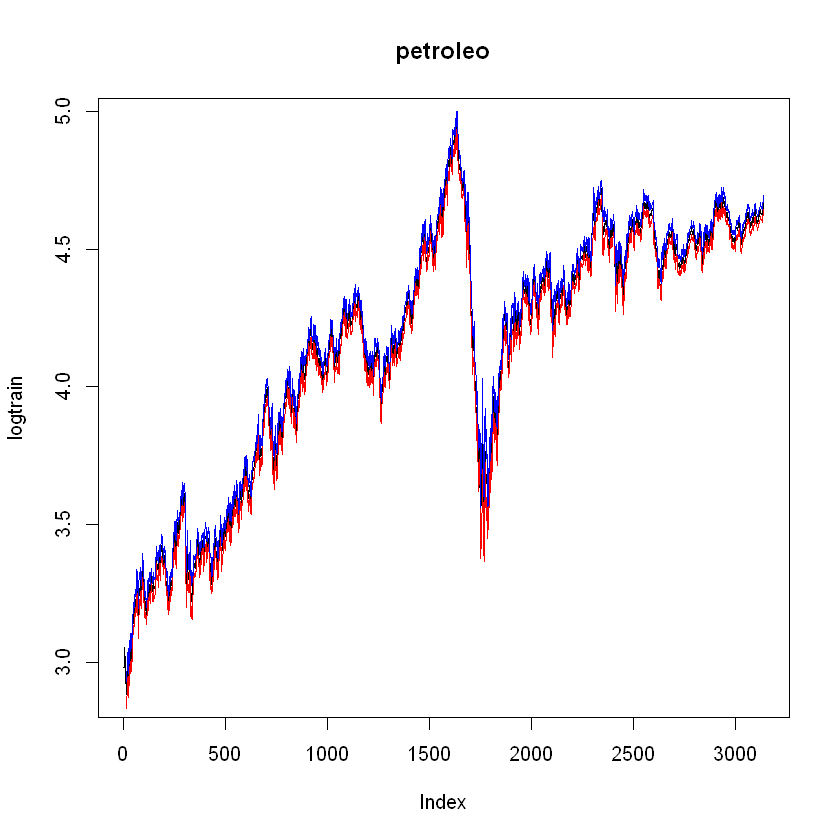

In [230]:
forecast211step1=forecast(arima211,1,level=95)
forecast211=forecast(arima211,1000,level=95) 
plot(forecast211)

#Compute ht, conditional variance:
ht.arch11=arch11$fit[,1]^2 #use 1st column of fit
plot(ht.arch11,main='Conditional variances')

#Generate plot of Log Price, 95% Upper and Lower limit
fit211=fitted.values(arima211)
low=fit211-1.96*sqrt(ht.arch11)
high=fit211+1.96*sqrt(ht.arch11)
plot(logtrain,type='l',main='petroleo')
lines(low,col='red')
lines(high,col='blue')

In [212]:
predtrain= exp(fitted.values(arima211))
a= Arima(logtest, model = arima211)
predtest= exp(fitted.values(a))
dftrain= data.frame(predtrain)
dftest = data.frame(predtest)
names(dftrain)[1]<-"pred"
names(dftest)[1]<-"pred"

In [221]:
dfpred= bind_rows(dftrain,dftest)
data$pred= round(dfpred$pred,2)
mydata <- read.dta13("predarch.dta")
data$predarch= round(mydata$hat,2)
#write_xlsx(x= data,path = "dataarimapred.xlsx")

Warning message in bind_rows_(x, .id):
"Vectorizing 'ts' elements may not preserve their attributes"Warning message in bind_rows_(x, .id):
"Vectorizing 'ts' elements may not preserve their attributes"